In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('C:/Users/kayab/OneDrive/Masaüstü/P.I Works/municipality_bus_utilization.csv')
data.head()

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019


In [3]:
data = data.sort_values(['timestamp', 'municipality_id'])
data.head(20)

,timestamp,municipality_id,usage,total_capacity
3,2017-06-04 07:59:42,0,204,2813
7,2017-06-04 07:59:42,1,129,397
6,2017-06-04 07:59:42,2,273,697
9,2017-06-04 07:59:42,3,623,1930
2,2017-06-04 07:59:42,4,1090,3893
5,2017-06-04 07:59:42,5,70,587
8,2017-06-04 07:59:42,6,597,3113
4,2017-06-04 07:59:42,7,718,2019
1,2017-06-04 07:59:42,8,556,2947
0,2017-06-04 07:59:42,9,454,1332


In [4]:
#Convert timestamp to datetime object
data['timestamp'] = pd.to_datetime(data.timestamp)
data.dtypes

timestamp          datetime64[ns]
municipality_id             int64
usage                       int64
total_capacity              int64
dtype: object

In [5]:
#Splitting the data to train and test sets as described in the description
data_train = data[data['timestamp'] < '2017-08-05'].copy()
data_test = data[data['timestamp'] >= '2017-08-05'].copy()

In [6]:
data_train.tail(10)

,timestamp,municipality_id,usage,total_capacity
10385,2017-08-02 16:32:54,0,638,2813
10386,2017-08-02 16:32:54,1,358,397
10388,2017-08-02 16:32:54,2,553,697
10382,2017-08-02 16:32:54,3,952,1930
10387,2017-08-02 16:32:54,4,2152,3893
10383,2017-08-02 16:32:54,5,114,587
10384,2017-08-02 16:32:54,6,1018,3113
10380,2017-08-02 16:32:54,7,1169,2019
10389,2017-08-02 16:32:54,8,1035,2947
10381,2017-08-02 16:32:54,9,625,1332


In [7]:
data_test.head(10)

,timestamp,municipality_id,usage,total_capacity
10398,2017-08-05 08:02:03,0,209,2813
10390,2017-08-05 08:02:03,1,141,397
10395,2017-08-05 08:02:03,2,286,697
10396,2017-08-05 08:02:03,3,610,1930
10393,2017-08-05 08:02:03,4,1782,3893
10399,2017-08-05 08:02:03,5,20,587
10391,2017-08-05 08:02:03,6,494,3113
10392,2017-08-05 08:02:03,7,581,2019
10394,2017-08-05 08:02:03,8,453,2947
10397,2017-08-05 08:02:03,9,304,1332


C:\Users\kayab\AppData\Local\Temp/ipykernel_16352/511993027.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cat_data['timestamp'].dt.strftime('%Y-%m-%d %H:%m:%s'))
C:\Users\kayab\AppData\Local\Temp/ipykernel_16352/511993027.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cat_data['timestamp'].dt.strftime('%Y-%m-%d %H:%m:%s'))
C:\Users\kayab\AppData\Local\Temp/ipykernel_16352/511993027.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cat_data['timestamp'].dt.strftime('%Y-%m-%d %H:%m:%s'))
C:\Users\kayab\AppData\Local\Temp/ipykernel_16352/511993027.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cat_data['timestamp'].dt.strftime('%Y-%m-%d %H:%m:%s'))
C:\Users\kayab\AppData\Local\Temp/ipykernel_16352/511993027.py:15: UserWarning: FixedFormatter should only be used together 

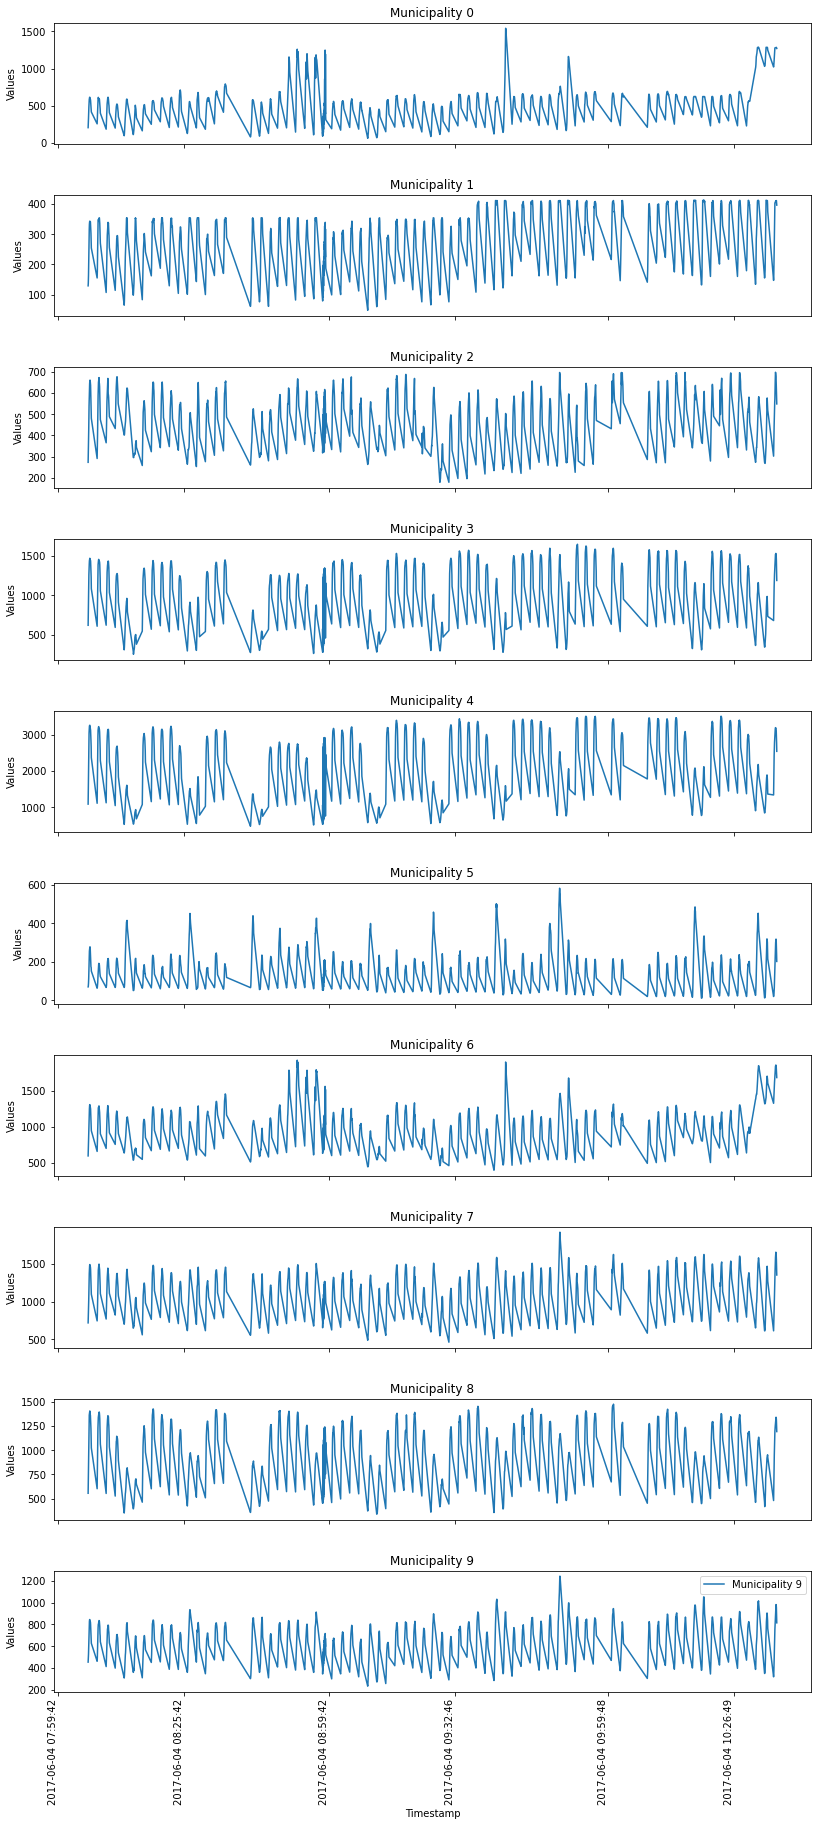

In [8]:
fig, axs = plt.subplots(nrows=10, ncols=1, sharex=True, figsize=(12, 26))

# Loop through each categorical value and plot it on its own subplot
for cat_val, ax in zip(range(10), axs):
    # Filter the data for the current categorical value
    cat_data = data[data['municipality_id'] == cat_val]

    # Plot the data on the subplot
    ax.plot(cat_data['timestamp'], cat_data['usage'], label=f'Municipality {cat_val}')

    # Set the y-axis label and subplot title
    ax.set_ylabel('Values')
    ax.set_title(f'Municipality {cat_val}')
    
    ax.set_xticklabels(cat_data['timestamp'].dt.strftime('%Y-%m-%d %H:%m:%s'))
    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# Set the x-axis label and legend on the last subplot
axs[-1].set_xlabel('Timestamp')
axs[-1].legend()

# Adjust the layout and padding of the subplots
fig.tight_layout(pad=3.0)

# Show the plot
plt.show()

In [9]:
missing_values = data.isna().sum()
missing_values

timestamp          0
municipality_id    0
usage              0
total_capacity     0
dtype: int64

In [10]:
#Turning the timestamps of train and test sets to datetime objects
data_train['timestamp'] = pd.to_datetime(data_train.timestamp)
data_train.set_index('timestamp', inplace=True)

data_test['timestamp'] = pd.to_datetime(data_test.timestamp)
data_test.set_index('timestamp', inplace=True)

print(data_train.dtypes, "\n", data_test.dtypes)

municipality_id    int64
usage              int64
total_capacity     int64
dtype: object 
 municipality_id    int64
usage              int64
total_capacity     int64
dtype: object


In [11]:
#In order to obtain hourly maximum usage values for the training set:
hourly_max_train = data_train.groupby('municipality_id').resample('H').max()
hourly_max_train.head(10)

municipality_id  usage  total_capacity
municipality_id timestamp                                                  
0               2017-06-04 07:00:00              0.0  204.0          2813.0
                2017-06-04 08:00:00              0.0  332.0          2813.0
                2017-06-04 09:00:00              0.0  485.0          2813.0
                2017-06-04 10:00:00              0.0  583.0          2813.0
                2017-06-04 11:00:00              0.0  614.0          2813.0
                2017-06-04 12:00:00              0.0  613.0          2813.0
                2017-06-04 13:00:00              0.0  605.0          2813.0
                2017-06-04 14:00:00              0.0  585.0          2813.0
                2017-06-04 15:00:00              0.0  520.0          2813.0
                2017-06-04 16:00:00              0.0  470.0          2813.0

In [12]:
#In order to obtain hourly maximum usage values for the test set:
hourly_max_test = data_test.groupby('municipality_id').resample('H').max()
hourly_max_test.head(10)

municipality_id  usage  total_capacity
municipality_id timestamp                                                  
0               2017-08-05 08:00:00              0.0  252.0          2813.0
                2017-08-05 09:00:00              0.0  393.0          2813.0
                2017-08-05 10:00:00              0.0  517.0          2813.0
                2017-08-05 11:00:00              0.0  653.0          2813.0
                2017-08-05 12:00:00              0.0  655.0          2813.0
                2017-08-05 13:00:00              0.0  649.0          2813.0
                2017-08-05 14:00:00              0.0  622.0          2813.0
                2017-08-05 15:00:00              0.0  559.0          2813.0
                2017-08-05 16:00:00              0.0  483.0          2813.0
                2017-08-05 17:00:00              NaN    NaN             NaN

In [13]:
hourly_max_train = hourly_max_train.dropna()
hourly_max_train.isna().sum()


municipality_id    0
usage              0
total_capacity     0
dtype: int64

In [14]:
hourly_max_test = hourly_max_test.dropna()
hourly_max_test.isna().sum()

municipality_id    0
usage              0
total_capacity     0
dtype: int64

In [15]:
hourly_max_train = hourly_max_train.rename(columns={'municipality_id':'to_be_dropped'})
hourly_max_train = hourly_max_train.reset_index(level='municipality_id').drop(columns=['to_be_dropped'])
hourly_max_train.head()

,municipality_id,usage,total_capacity
timestamp,,,
2017-06-04 07:00:00,0,204.0,2813.0
2017-06-04 08:00:00,0,332.0,2813.0
2017-06-04 09:00:00,0,485.0,2813.0
2017-06-04 10:00:00,0,583.0,2813.0
2017-06-04 11:00:00,0,614.0,2813.0


In [16]:
#Applying the same procedure to the test set:
hourly_max_test = hourly_max_test.rename(columns={'municipality_id':'to_be_dropped'})
hourly_max_test = hourly_max_test.reset_index(level='municipality_id').drop(columns=['to_be_dropped'])
hourly_max_test.head()

,municipality_id,usage,total_capacity
timestamp,,,
2017-08-05 08:00:00,0,252.0,2813.0
2017-08-05 09:00:00,0,393.0,2813.0
2017-08-05 10:00:00,0,517.0,2813.0
2017-08-05 11:00:00,0,653.0,2813.0
2017-08-05 12:00:00,0,655.0,2813.0


In [17]:
#We know that there are no missing values within the existing columns
#However upon inspecting the first values of hourly_max_test and tail values
#of hourly_max_train we can see that certain days are missing in the timestamp column
#Which means we need to investigate 3 time periods to see if there are any missing days.
#First, within the hourly_max_train, then between the hourly_max_train and hourly_max_test,
#and laslty within the hourly_max_test.
#Starting with the missing dates in hourly_max_train
start_date = hourly_max_train.index.min().date()
end_date = hourly_max_train.index.max().date()

date_range = pd.date_range(start=start_date, end=end_date, freq=('D'))

missing_dates_in_train = set(date_range) - set(hourly_max_train.index.floor('D'))
missing_dates_in_train

{Timestamp('2017-06-20 00:00:00', freq='D'),
 Timestamp('2017-06-21 00:00:00', freq='D'),
 Timestamp('2017-07-31 00:00:00', freq='D')}

In [18]:
#Applying a similar procedure to inspect whether there are dates missing between
#hourly_max_train and hourly_max_test
start_date = hourly_max_train.index.max().date()
end_date = hourly_max_test.index.min().date()

date_range = pd.date_range(start=start_date, end=end_date, freq='D')

missing_dates_inbetween = set(date_range) - set(hourly_max_test.index.floor('D'))
missing_dates_inbetween

{Timestamp('2017-08-02 00:00:00', freq='D'),
 Timestamp('2017-08-03 00:00:00', freq='D'),
 Timestamp('2017-08-04 00:00:00', freq='D')}

In [19]:
#Applying a similar procedure to inspect whether there are dates missing in
#hourly_max_test
start_date = hourly_max_test.index.min().date()
end_date = hourly_max_test.index.max().date()

date_range = pd.date_range(start=start_date, end=end_date, freq='D')

missing_dates_in_test = set(date_range) - set(hourly_max_test.index.floor('D'))
missing_dates_in_test

set()

In [20]:
hourly_max_train[['usage', 'total_capacity', 'municipality_id']] = hourly_max_train[['usage', 'total_capacity', 'municipality_id']].astype(int)
hourly_max_test[['usage', 'total_capacity', 'municipality_id']] = hourly_max_test[['usage', 'total_capacity', 'municipality_id']].astype(int)

In [21]:
#Now, adding the missing dates to their respective sets
missing_ranges_train = [pd.date_range(start='2017-06-20 07:00:00', end='2017-06-20 16:00:00', freq='H'),
                  pd.date_range(start='2017-06-21 07:00:00', end='2017-06-21 16:00:00', freq='H'),
                  pd.date_range(start='2017-07-31 07:00:00', end='2017-07-31 16:00:00', freq='H'),
                  pd.date_range(start='2017-08-03 07:00:00', end='2017-08-03 16:00:00', freq='H'),
                  pd.date_range(start='2017-08-04 07:00:00', end='2017-08-04 16:00:00', freq='H')]

missing_dates = []
for rng in missing_ranges_train:
    missing_dates.extend(rng)

missing_dates

[Timestamp('2017-06-20 07:00:00', freq='H'),
 Timestamp('2017-06-20 08:00:00', freq='H'),
 Timestamp('2017-06-20 09:00:00', freq='H'),
 Timestamp('2017-06-20 10:00:00', freq='H'),
 Timestamp('2017-06-20 11:00:00', freq='H'),
 Timestamp('2017-06-20 12:00:00', freq='H'),
 Timestamp('2017-06-20 13:00:00', freq='H'),
 Timestamp('2017-06-20 14:00:00', freq='H'),
 Timestamp('2017-06-20 15:00:00', freq='H'),
 Timestamp('2017-06-20 16:00:00', freq='H'),
 Timestamp('2017-06-21 07:00:00', freq='H'),
 Timestamp('2017-06-21 08:00:00', freq='H'),
 Timestamp('2017-06-21 09:00:00', freq='H'),
 Timestamp('2017-06-21 10:00:00', freq='H'),
 Timestamp('2017-06-21 11:00:00', freq='H'),
 Timestamp('2017-06-21 12:00:00', freq='H'),
 Timestamp('2017-06-21 13:00:00', freq='H'),
 Timestamp('2017-06-21 14:00:00', freq='H'),
 Timestamp('2017-06-21 15:00:00', freq='H'),
 Timestamp('2017-06-21 16:00:00', freq='H'),
 Timestamp('2017-07-31 07:00:00', freq='H'),
 Timestamp('2017-07-31 08:00:00', freq='H'),
 Timestamp

In [22]:
import itertools

#Defining the range of municipality_ids
municipality_ids = range(10)

new_rows = pd.DataFrame(
    list(itertools.product(missing_dates, municipality_ids)),
    columns=['timestamp', 'municipality_id']
)

#Setting the total capacity for each municipality ID
total_capacities_dict = {0:2813, 1:397, 2:697, 3:1930, 4:3893, 5:587, 6:3113, 7:2019, 8:2947, 9:1332}

new_rows['total_capacity'] = new_rows['municipality_id'].map(total_capacities_dict)
new_rows['timestamp'] = pd.to_datetime(new_rows['timestamp'])
#Setting usage column values to be NaNs to be later interpolated
new_rows['usage'] = np.nan
new_rows = new_rows[['timestamp', 'municipality_id', 'usage', 'total_capacity']]


In [23]:
new_rows.dtypes

timestamp          datetime64[ns]
municipality_id             int64
usage                     float64
total_capacity              int64
dtype: object

In [24]:
hourly_max_train.reset_index(inplace=True)

In [25]:
hourly_max_train.dtypes

timestamp          datetime64[ns]
municipality_id             int32
usage                       int32
total_capacity              int32
dtype: object

In [26]:
hourly_max_train = hourly_max_train.reset_index()
hourly_max_train = pd.concat([hourly_max_train, new_rows], ignore_index=True)
hourly_max_train = hourly_max_train.drop('index', axis=1)

In [27]:
hourly_max_train[hourly_max_train['timestamp'] == '2017-06-21 07:00:00']

,timestamp,municipality_id,usage,total_capacity
5420,2017-06-21 07:00:00,0,NaN,2813
5421,2017-06-21 07:00:00,1,NaN,397
5422,2017-06-21 07:00:00,2,NaN,697
5423,2017-06-21 07:00:00,3,NaN,1930
5424,2017-06-21 07:00:00,4,NaN,3893
5425,2017-06-21 07:00:00,5,NaN,587
5426,2017-06-21 07:00:00,6,NaN,3113
5427,2017-06-21 07:00:00,7,NaN,2019
5428,2017-06-21 07:00:00,8,NaN,2947
5429,2017-06-21 07:00:00,9,NaN,1332


In [28]:
len(hourly_max_train)

5820

In [29]:
hourly_max_train[hourly_max_train['timestamp'] == '2017-06-20 08:00:00']

,timestamp,municipality_id,usage,total_capacity
5330,2017-06-20 08:00:00,0,NaN,2813
5331,2017-06-20 08:00:00,1,NaN,397
5332,2017-06-20 08:00:00,2,NaN,697
5333,2017-06-20 08:00:00,3,NaN,1930
5334,2017-06-20 08:00:00,4,NaN,3893
5335,2017-06-20 08:00:00,5,NaN,587
5336,2017-06-20 08:00:00,6,NaN,3113
5337,2017-06-20 08:00:00,7,NaN,2019
5338,2017-06-20 08:00:00,8,NaN,2947
5339,2017-06-20 08:00:00,9,NaN,1332


# Feature Engineering

In [30]:
hourly_max_test = hourly_max_test.reset_index()

In [31]:
hourly_max_train = hourly_max_train.sort_values(['timestamp', 'municipality_id'])
hourly_max_test = hourly_max_test.sort_values(['timestamp', 'municipality_id'])

In [32]:
hourly_max_test.head(10)

,timestamp,municipality_id,usage,total_capacity
0,2017-08-05 08:00:00,0,252,2813
142,2017-08-05 08:00:00,1,158,397
284,2017-08-05 08:00:00,2,327,697
426,2017-08-05 08:00:00,3,781,1930
568,2017-08-05 08:00:00,4,2132,3893
710,2017-08-05 08:00:00,5,23,587
852,2017-08-05 08:00:00,6,571,3113
994,2017-08-05 08:00:00,7,651,2019
1136,2017-08-05 08:00:00,8,572,2947
1278,2017-08-05 08:00:00,9,333,1332


In [33]:
#Setting up a 1-step target
hourly_max_train['usage_next_hour'] = hourly_max_train.groupby("municipality_id")["usage"].shift(-1)

hourly_max_test['usage_next_hour'] = hourly_max_test.groupby("municipality_id")["usage"].shift(-1)

In [34]:
hourly_max_train[hourly_max_train['municipality_id'] == 0].head()

,timestamp,municipality_id,usage,total_capacity,usage_next_hour
0,2017-06-04 07:00:00,0,204.0,2813,332.0
1,2017-06-04 08:00:00,0,332.0,2813,485.0
2,2017-06-04 09:00:00,0,485.0,2813,583.0
3,2017-06-04 10:00:00,0,583.0,2813,614.0
4,2017-06-04 11:00:00,0,614.0,2813,613.0


In [35]:
hourly_max_train.tail(10)

,timestamp,municipality_id,usage,total_capacity,usage_next_hour
5810,2017-08-04 16:00:00,0,NaN,2813,NaN
5811,2017-08-04 16:00:00,1,NaN,397,NaN
5812,2017-08-04 16:00:00,2,NaN,697,NaN
5813,2017-08-04 16:00:00,3,NaN,1930,NaN
5814,2017-08-04 16:00:00,4,NaN,3893,NaN
5815,2017-08-04 16:00:00,5,NaN,587,NaN
5816,2017-08-04 16:00:00,6,NaN,3113,NaN
5817,2017-08-04 16:00:00,7,NaN,2019,NaN
5818,2017-08-04 16:00:00,8,NaN,2947,NaN
5819,2017-08-04 16:00:00,9,NaN,1332,NaN


In [36]:
hourly_max_test.tail(10)

,timestamp,municipality_id,usage,total_capacity,usage_next_hour
141,2017-08-19 16:00:00,0,1276,2813,NaN
283,2017-08-19 16:00:00,1,401,397,NaN
425,2017-08-19 16:00:00,2,580,697,NaN
567,2017-08-19 16:00:00,3,1330,1930,NaN
709,2017-08-19 16:00:00,4,2779,3893,NaN
851,2017-08-19 16:00:00,5,239,587,NaN
993,2017-08-19 16:00:00,6,1727,3113,NaN
1135,2017-08-19 16:00:00,7,1450,2019,NaN
1277,2017-08-19 16:00:00,8,1253,2947,NaN
1419,2017-08-19 16:00:00,9,879,1332,NaN


In [37]:
#Creating lag for an autoregressive model
hourly_max_train['lag_usage_1h'] = hourly_max_train.groupby("municipality_id")["usage"].shift(1)
hourly_max_test['lag_usage_1h'] = hourly_max_test.groupby("municipality_id")["usage"].shift(1)

In [38]:
hourly_max_train[hourly_max_train['municipality_id'] == 0].head()

,timestamp,municipality_id,usage,total_capacity,usage_next_hour,lag_usage_1h
0,2017-06-04 07:00:00,0,204.0,2813,332.0,NaN
1,2017-06-04 08:00:00,0,332.0,2813,485.0,204.0
2,2017-06-04 09:00:00,0,485.0,2813,583.0,332.0
3,2017-06-04 10:00:00,0,583.0,2813,614.0,485.0
4,2017-06-04 11:00:00,0,614.0,2813,613.0,583.0


In [39]:
#Creating the difference column in which we subtract the previous hour's usage from the current hour's
hourly_max_train['diff_usage_1h'] = hourly_max_train.groupby('municipality_id')['usage'].diff(1)
hourly_max_test['diff_usage_1h'] = hourly_max_test.groupby('municipality_id')['usage'].diff(1)

hourly_max_train[hourly_max_train['municipality_id'] == 0].head()

,timestamp,municipality_id,usage,total_capacity,usage_next_hour,lag_usage_1h,diff_usage_1h
0,2017-06-04 07:00:00,0,204.0,2813,332.0,NaN,NaN
1,2017-06-04 08:00:00,0,332.0,2813,485.0,204.0,128.0
2,2017-06-04 09:00:00,0,485.0,2813,583.0,332.0,153.0
3,2017-06-04 10:00:00,0,583.0,2813,614.0,485.0,98.0
4,2017-06-04 11:00:00,0,614.0,2813,613.0,583.0,31.0


In [40]:
 #Implementing the rolling statistics
hourly_max_train['mean_usage_daily'] = hourly_max_train.groupby('municipality_id')['usage'].rolling(10).mean().reset_index(level=0, drop=True)
hourly_max_test['mean_usage_daily'] = hourly_max_test.groupby('municipality_id')['usage'].rolling(10).mean().reset_index(level=0, drop=True)

hourly_max_train[hourly_max_train['municipality_id'] == 0].head()

,timestamp,municipality_id,usage,total_capacity,usage_next_hour,lag_usage_1h,diff_usage_1h,mean_usage_daily
0,2017-06-04 07:00:00,0,204.0,2813,332.0,NaN,NaN,NaN
1,2017-06-04 08:00:00,0,332.0,2813,485.0,204.0,128.0,NaN
2,2017-06-04 09:00:00,0,485.0,2813,583.0,332.0,153.0,NaN
3,2017-06-04 10:00:00,0,583.0,2813,614.0,485.0,98.0,NaN
4,2017-06-04 11:00:00,0,614.0,2813,613.0,583.0,31.0,NaN


In [41]:
#Since there is no speacial dates within the timestamps, we may be fine by not investigating such dates

# Evaluation Metrics

In [42]:
#defining mean absolute percent error function
def mape(y_true, y_pred):
    ape = np.abs((y_true - y_pred) / y_true)
    #in order to avoid division by zero (even though it is unlikely for our dataset)
    ape[~np.isfinite(ape)] = 1
    return np.mean(ape)

#another metric we can use is the weighted mean absolute percent error
def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))

# Establishing a baseline

A solid baseline to begin with in order to compare the performance of our model is assuming that the next hour's usage is equal to the last hour's usage.

In [43]:
hourly_max_train['usage_next_hour'].fillna(hourly_max_train['usage_next_hour'].mean(), inplace=True)
hourly_max_test['usage_next_hour'].fillna(hourly_max_test['usage_next_hour'].mean(), inplace=True)

In [44]:
y_pred = hourly_max_train['usage']
y_true = hourly_max_train['usage_next_hour']

mape(y_true, y_pred)

0.2971290033576374

In [45]:
wmape(y_true, y_pred)

0.12840709145604853

# Model Training

In [46]:
features = ['usage', 'lag_usage_1h', 'diff_usage_1h', 'mean_usage_daily']

In order to fill the NaN values, I would often use linear interpolation for cases which require less data imputation. However, since the missing values after adding the missing dates partake a big portion of the dataset I will simply be using the SimpleImputer to fill out the missing values.

In [47]:
imputer = SimpleImputer()
X_train = imputer.fit_transform(hourly_max_train[features])
y_train = hourly_max_train['usage_next_hour']

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=6)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=6, random_state=42)

# Evaluating the Model

In [48]:
X_test = imputer.transform(hourly_max_test[features])
y_test = hourly_max_test['usage_next_hour']

prediction = model.predict(X_test)

In [49]:
mape(y_test, prediction)

0.17923598253508888

In [50]:
wmape(y_test, prediction)

0.08538714247580866

# Conclusion

We can observe decrease in both Mean Absolute Percent Error and Weighted Mean Absolute Percent Error meaning that even though our imputation and modelling is quite basic, we've managed to improve our prediction. In order to further enhance the modelling, we can use different model such as XGBoost, or we can stick with RandomForestRegressor and do a grid search in order to find the most optimal hyperparameters.